# ML project
HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

Data source: https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis?select=Test_Beneficiarydata-1542969243754.csv

# Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #viz
import seaborn as sns #viz

# Read the datasets
df_provider = pd.read_csv('/content/MLProject/Train-1542865627584.csv')
df_beneficiary = pd.read_csv('/content/MLProject/Train_Beneficiarydata-1542865627584.csv')
df_inpatient = pd.read_csv('/content/MLProject/Train_Inpatientdata-1542865627584.csv')
df_outpatient = pd.read_csv('/content/MLProject/Train_Outpatientdata-1542865627584.csv')


# Exploratory Data Analysis

value count
histogram
boxplot






## 1. Provider Data Analysis

*   5410 unique values
*   506 fraud provider; 9.4%

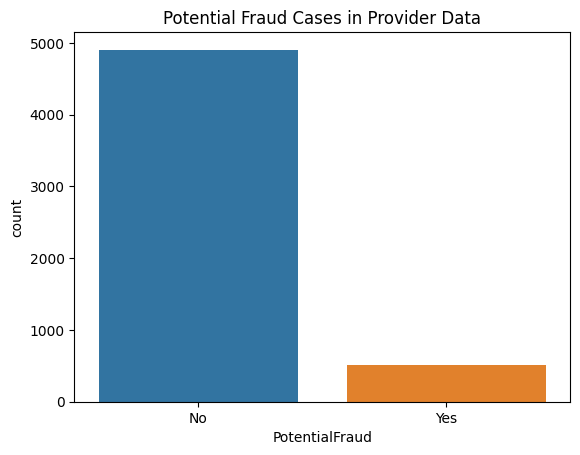

In [ ]:
# Check the number of potential fraud cases in provider data
sns.countplot(x="PotentialFraud", data=df_provider)
plt.title('Potential Fraud Cases in Provider Data')
plt.show()

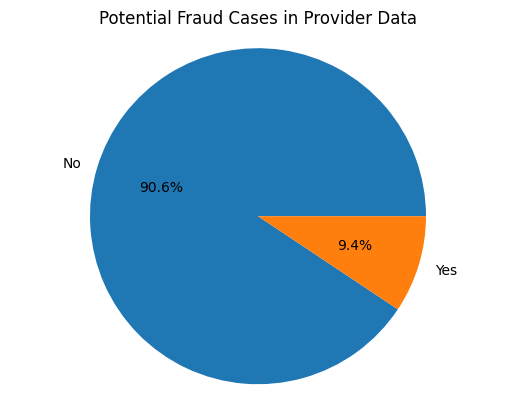

In [ ]:
fraud_counts = df_provider["PotentialFraud"].value_counts()

plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title('Potential Fraud Cases in Provider Data')
plt.axis('equal')  
plt.show()

In [ ]:
# Replace Yes-1; No-0
df_provider["PotentialFraud"]=df_provider["PotentialFraud"].replace({"Yes":1,"No":0})

In [ ]:
df_provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.7+ KB


## 2. Beneficiary Data Analysis


*  No duplicates
*  Total 38556 unique BeneID
*  Not sure what no. in Race, State, County means
*  Chronic disease which is yes, 1 or 2?
*  Need to calculate age in Python
*  Drop PartACov, PartBCov



In [ ]:
df_beneficiary.shape

(138556, 25)

In [ ]:
df_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
df_beneficiary.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


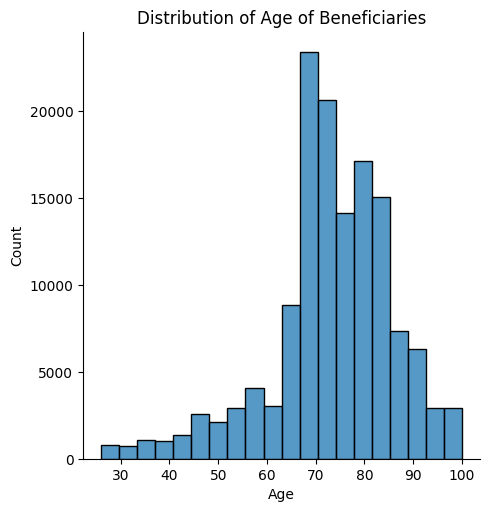

mean age: 73.12488091457605


In [ ]:
# Check the distribution of age of beneficiaries
df_beneficiary['DOB'] = pd.to_datetime(df_beneficiary['DOB'], format='%Y-%m-%d', errors='coerce')
df_beneficiary['DOD'] = pd.to_datetime(df_beneficiary['DOD'], format='%Y-%m-%d')
df_beneficiary['DOD'] = df_beneficiary['DOD'].fillna(df_beneficiary["DOD"].max())
df_beneficiary['Age'] = (df_beneficiary["DOD"] - df_beneficiary['DOB']).astype('<m8[Y]')

sns.displot(df_beneficiary['Age'], kde=False, bins=20)
plt.title('Distribution of Age of Beneficiaries')
plt.show()

mean_age = np.mean(df_beneficiary['Age'] )
print(f"mean age:" ,mean_age)

In [ ]:
# Replace Renal Disease Indicator
df_beneficiary["RenalDiseaseIndicator"]=df_beneficiary["RenalDiseaseIndicator"].replace({"Y":1,"0":0})

In [ ]:
# Sum disease score
chronic_conditions = ['RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                      'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
df_beneficiary['diseaseScore'] = df_beneficiary[chronic_conditions].sum(axis=1)
df_beneficiary['diseaseScore'].describe()

count    138556.000000
mean         18.402170
std           2.265938
min          11.000000
25%          17.000000
50%          19.000000
75%          20.000000
max          23.000000
Name: diseaseScore, dtype: float64

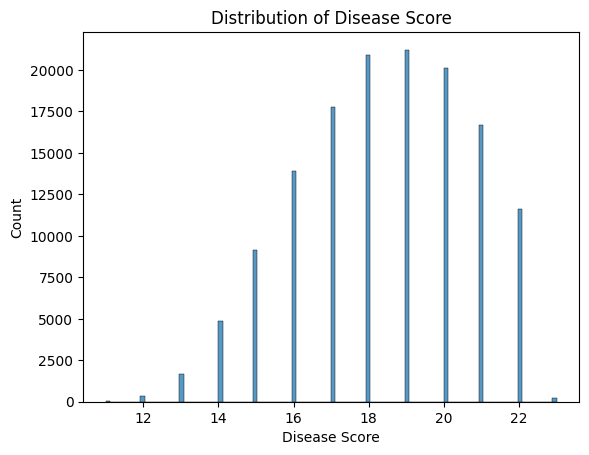

In [ ]:

sns.histplot(data=df_beneficiary, x='diseaseScore')
plt.xlabel('Disease Score')
plt.ylabel('Count')
plt.title('Distribution of Disease Score')
plt.show()

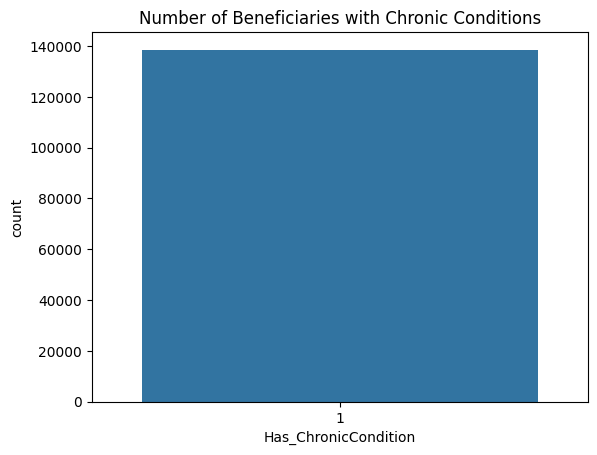

In [ ]:
# Check the number of beneficiaries with chronic conditions

df_beneficiary['Has_ChronicCondition'] = df_beneficiary[chronic_conditions].apply(lambda x: 1 if x.any() else 0, axis=1)
sns.countplot(x="Has_ChronicCondition", data=df_beneficiary)
plt.title('Number of Beneficiaries with Chronic Conditions')
plt.show()

Text(0.5, 1.0, 'Distribution of Alz')

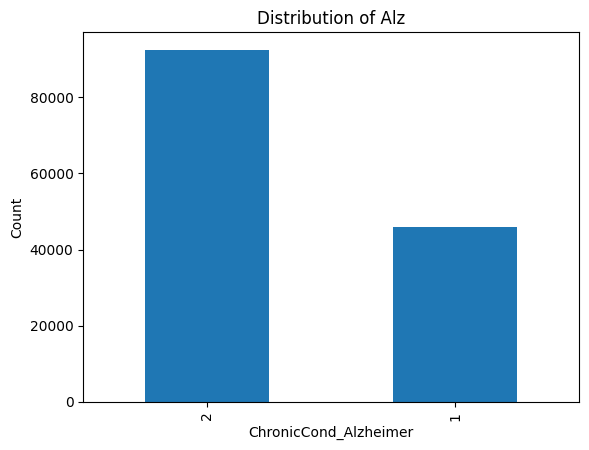

In [ ]:
df_beneficiary['ChronicCond_Alzheimer'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_Alzheimer')
plt.ylabel('Count')
plt.title('Distribution of Alz')

Text(0.5, 1.0, 'Distribution of Heartfailure')

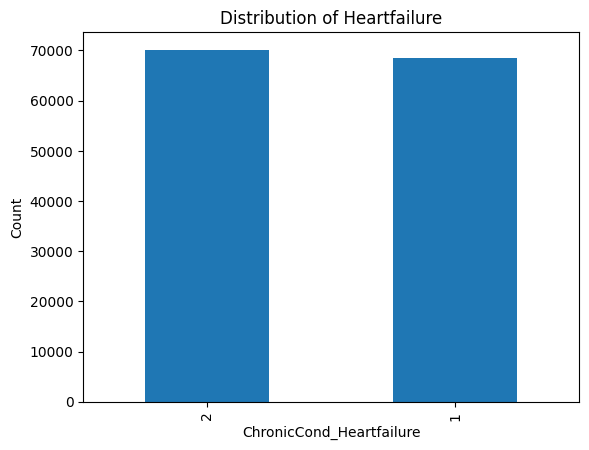

In [ ]:
df_beneficiary['ChronicCond_Heartfailure'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_Heartfailure')
plt.ylabel('Count')
plt.title('Distribution of Heartfailure')

Text(0.5, 1.0, 'Distribution of KidneyDisease')

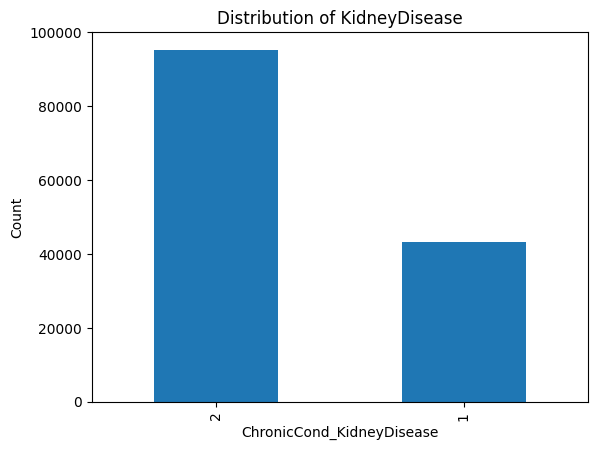

In [ ]:
df_beneficiary['ChronicCond_KidneyDisease'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_KidneyDisease')
plt.ylabel('Count')
plt.title('Distribution of KidneyDisease')

Text(0.5, 1.0, 'Distribution of Cancer')

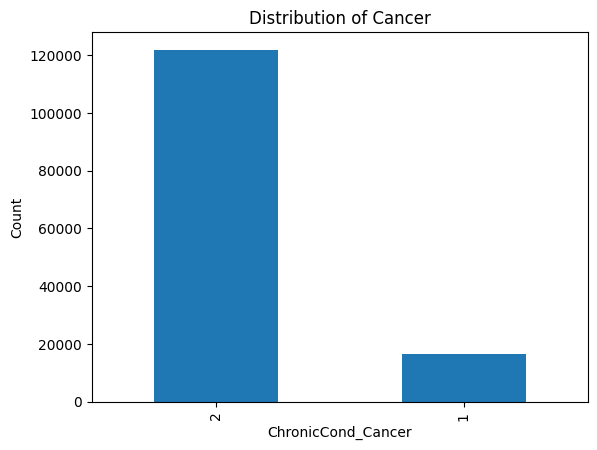

In [ ]:
df_beneficiary['ChronicCond_Cancer'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_Cancer')
plt.ylabel('Count')
plt.title('Distribution of Cancer')

Text(0.5, 1.0, 'Distribution of ObstrPulmonary')

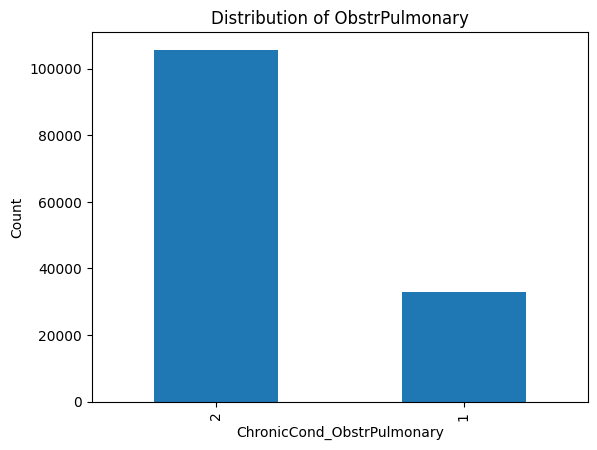

In [ ]:
df_beneficiary['ChronicCond_ObstrPulmonary'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_ObstrPulmonary')
plt.ylabel('Count')
plt.title('Distribution of ObstrPulmonary')

Text(0.5, 1.0, 'Distribution of Depression')

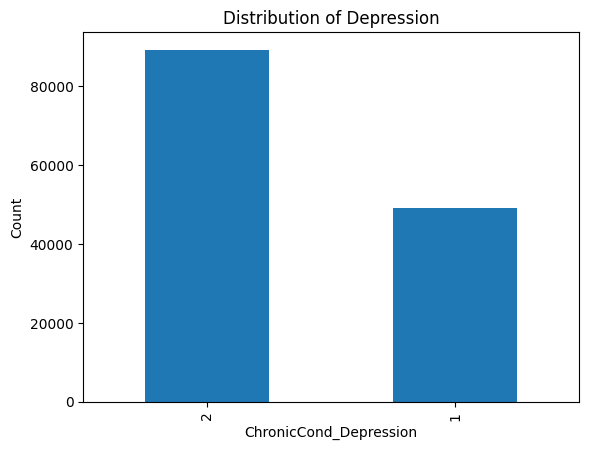

In [ ]:
df_beneficiary['ChronicCond_Depression'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_Depression')
plt.ylabel('Count')
plt.title('Distribution of Depression')

Text(0.5, 1.0, 'Distribution of Diabetes')

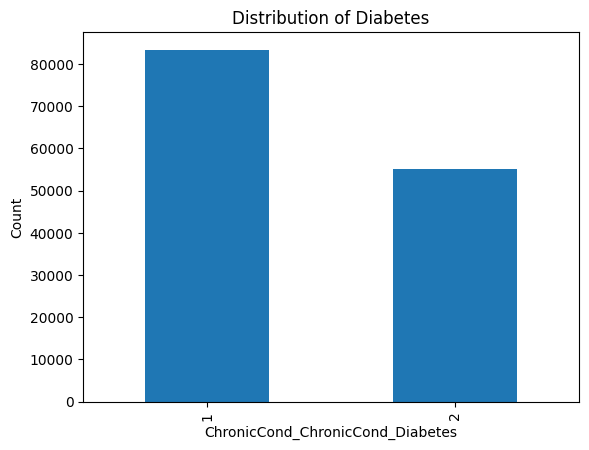

In [ ]:
df_beneficiary['ChronicCond_Diabetes'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_ChronicCond_Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')

Text(0.5, 1.0, 'Distribution of IschemicHeart')

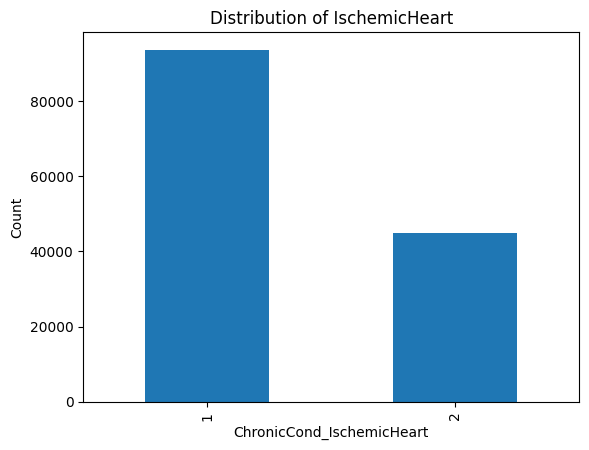

In [ ]:
df_beneficiary['ChronicCond_IschemicHeart'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_IschemicHeart')
plt.ylabel('Count')
plt.title('Distribution of IschemicHeart')

Text(0.5, 1.0, 'Distribution of Osteoporasis')

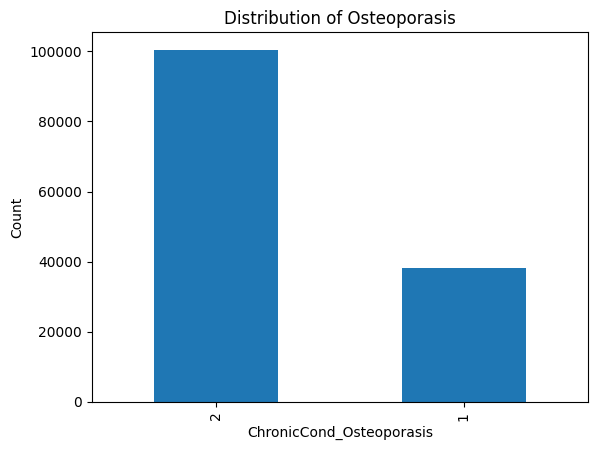

In [ ]:
df_beneficiary['ChronicCond_Osteoporasis'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_Osteoporasis')
plt.ylabel('Count')
plt.title('Distribution of Osteoporasis')

Text(0.5, 1.0, 'Distribution of rheumatoidarthritis')

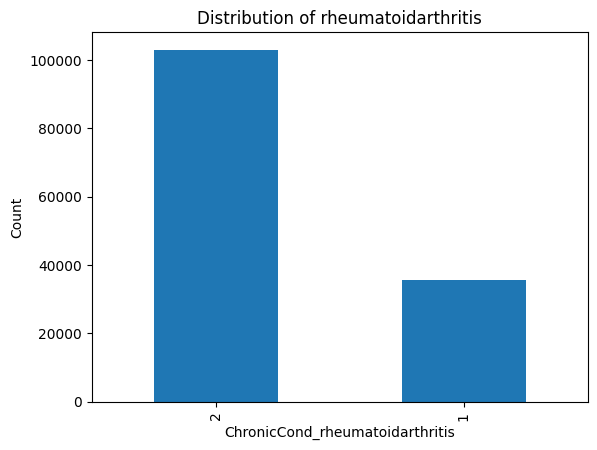

In [ ]:
df_beneficiary['ChronicCond_rheumatoidarthritis'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_rheumatoidarthritis')
plt.ylabel('Count')
plt.title('Distribution of rheumatoidarthritis')

Text(0.5, 1.0, 'Distribution of stroke')

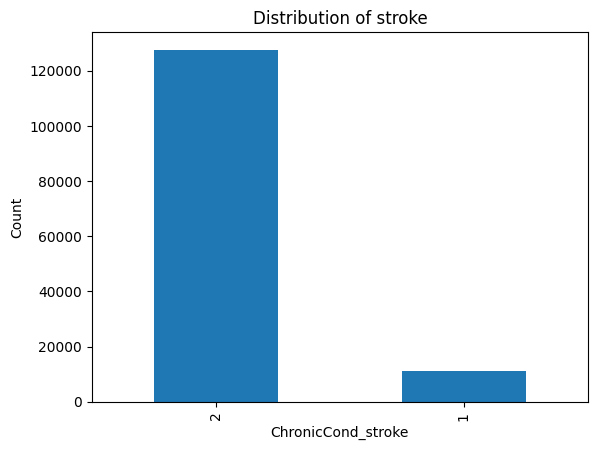

In [ ]:
df_beneficiary['ChronicCond_stroke'].value_counts().plot(kind='bar')
plt.xlabel('ChronicCond_stroke')
plt.ylabel('Count')
plt.title('Distribution of stroke')

In [ ]:
correlation = df_beneficiary['Age'].corr(df_beneficiary['diseaseScore'])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.0704690775259957


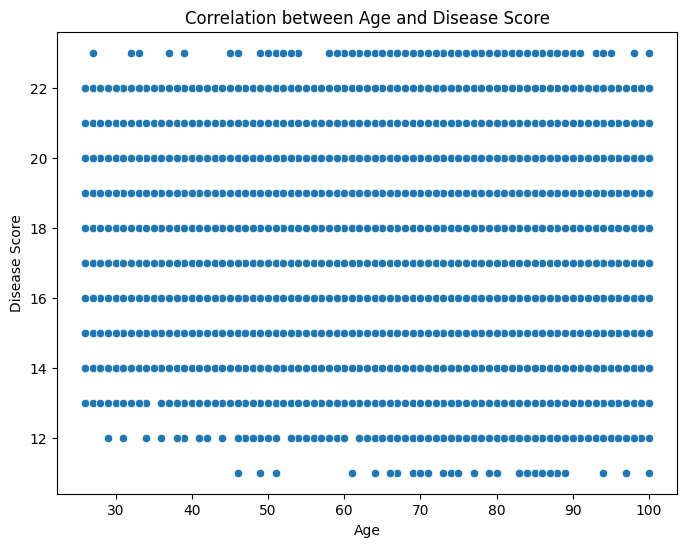

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_beneficiary, x='Age', y='diseaseScore')
plt.xlabel('Age')
plt.ylabel('Disease Score')
plt.title('Correlation between Age and Disease Score')
plt.show()

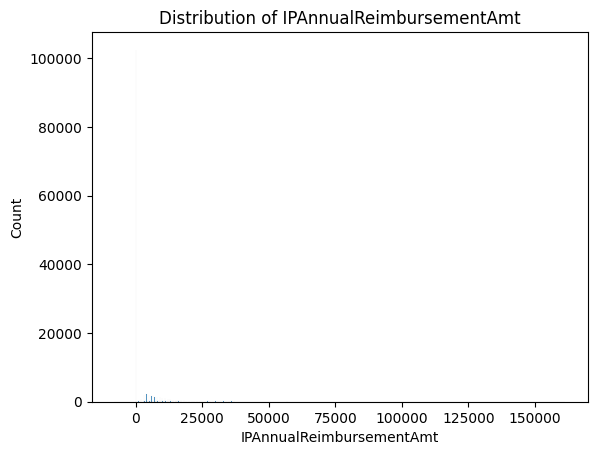

In [ ]:
sns.histplot(data=df_beneficiary, x='IPAnnualReimbursementAmt')
plt.xlabel('IPAnnualReimbursementAmt')
plt.ylabel('Count')
plt.title('Distribution of IPAnnualReimbursementAmt')
plt.show()

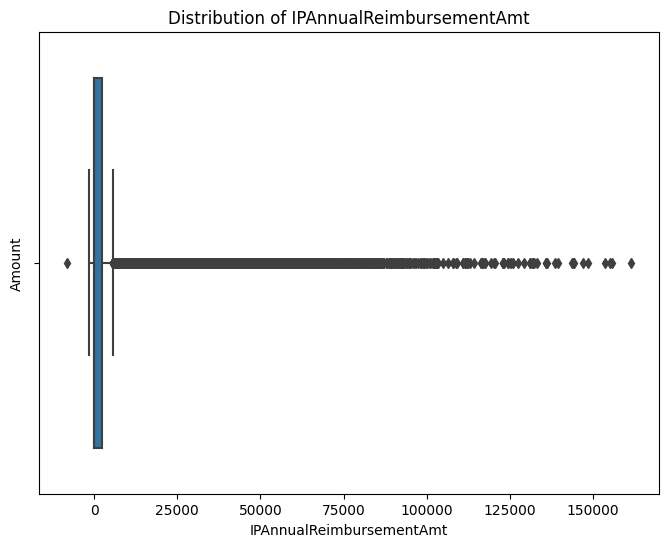

count    138556.000000
mean       3660.346502
std        9568.621827
min       -8000.000000
25%           0.000000
50%           0.000000
75%        2280.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_beneficiary, x='IPAnnualReimbursementAmt')
plt.xlabel('IPAnnualReimbursementAmt')
plt.ylabel('Amount')
plt.title('Distribution of IPAnnualReimbursementAmt')
plt.show()
df_beneficiary.IPAnnualReimbursementAmt.describe()

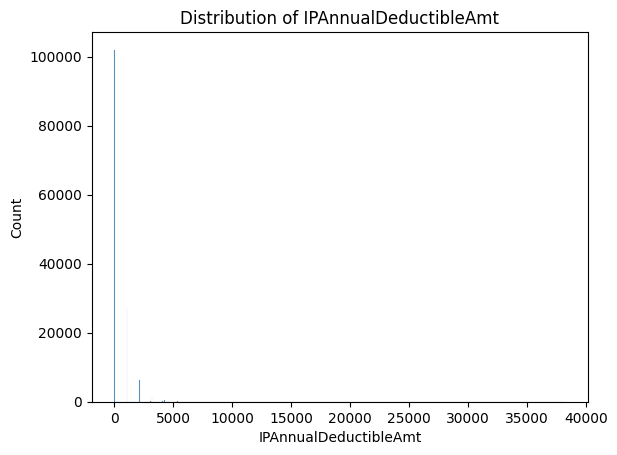

In [ ]:
sns.histplot(data=df_beneficiary, x='IPAnnualDeductibleAmt')
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('Count')
plt.title('Distribution of IPAnnualDeductibleAmt')
plt.show()

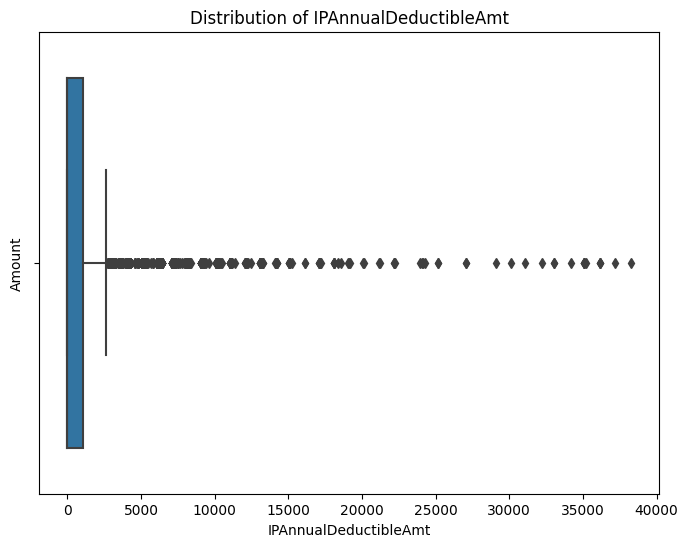

count    138556.000000
mean        399.847296
std         956.175202
min           0.000000
25%           0.000000
50%           0.000000
75%        1068.000000
max       38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_beneficiary, x='IPAnnualDeductibleAmt')
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('Amount')
plt.title('Distribution of IPAnnualDeductibleAmt')
plt.show()
df_beneficiary.IPAnnualDeductibleAmt.describe()

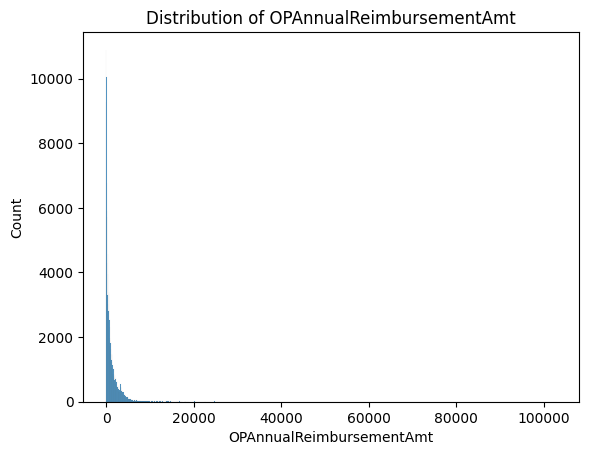

In [ ]:
sns.histplot(data=df_beneficiary, x='OPAnnualReimbursementAmt')
plt.xlabel('OPAnnualReimbursementAmt')
plt.ylabel('Count')
plt.title('Distribution of OPAnnualReimbursementAmt')
plt.show()

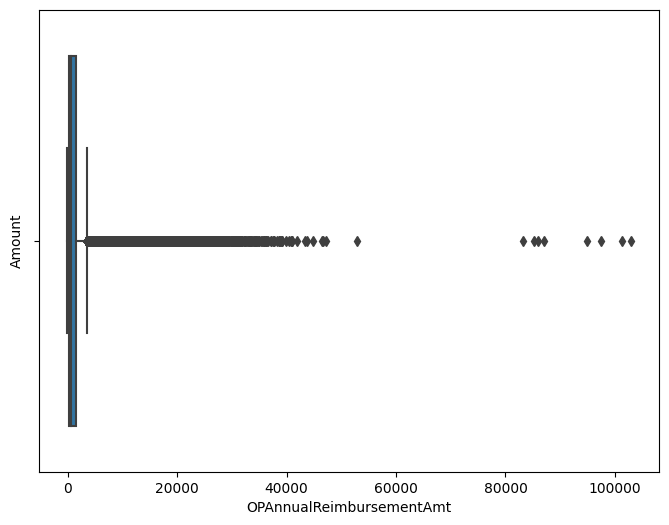

count    138556.000000
mean       1298.219348
std        2493.901134
min         -70.000000
25%         170.000000
50%         570.000000
75%        1500.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_beneficiary, x='OPAnnualReimbursementAmt')
plt.xlabel('OPAnnualReimbursementAmt')
plt.ylabel('Amount')
plt.show()
df_beneficiary.OPAnnualReimbursementAmt.describe()

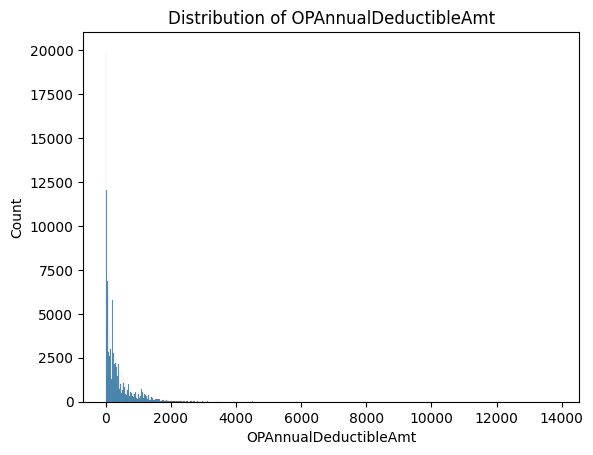

In [ ]:
sns.histplot(data=df_beneficiary, x='OPAnnualDeductibleAmt')
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('Count')
plt.title('Distribution of OPAnnualDeductibleAmt')
plt.show()

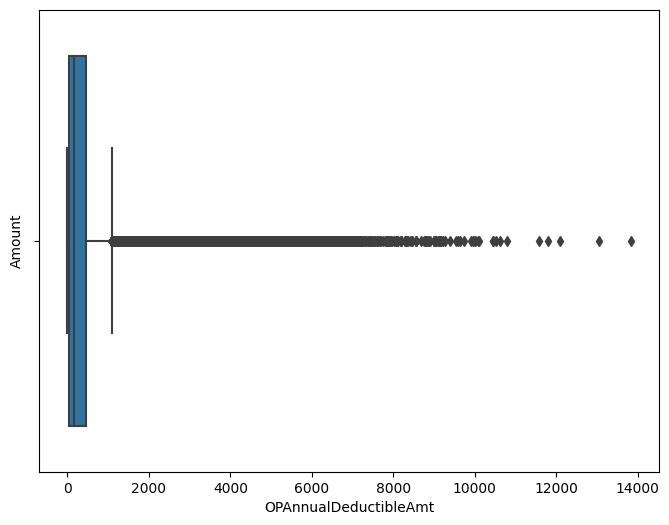

count    138556.000000
mean        377.718258
std         645.530187
min           0.000000
25%          40.000000
50%         170.000000
75%         460.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_beneficiary, x='OPAnnualDeductibleAmt')
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('Amount')
plt.show()
df_beneficiary.OPAnnualDeductibleAmt.describe()

## 3. Inpatient Data Analysis
* distinct BeneID 30401; total claim 38992. Different from Kaggle data???
* Avg stay 5.493 days
* Max 7 claim/year
* Avg Amount Reimbursed 10.1k
* drop (OperatingPhysician),OtherPhysician, ClmProcedureCode_1~

In [ ]:
df_inpatient.shape

(40474, 30)

In [ ]:
df_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
df_inpatient['ClaimStartDt'] = pd.to_datetime(df_inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
df_inpatient['ClaimEndDt'] = pd.to_datetime(df_inpatient['ClaimEndDt'],format = '%Y-%m-%d')
df_inpatient['Claimdt'] = ((df_inpatient['ClaimEndDt']  - df_inpatient['ClaimStartDt']).dt.days)+1
df_inpatient['Claimdt'].describe()

count    40474.000000
mean         6.660251
std          5.628873
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         37.000000
Name: Claimdt, dtype: float64

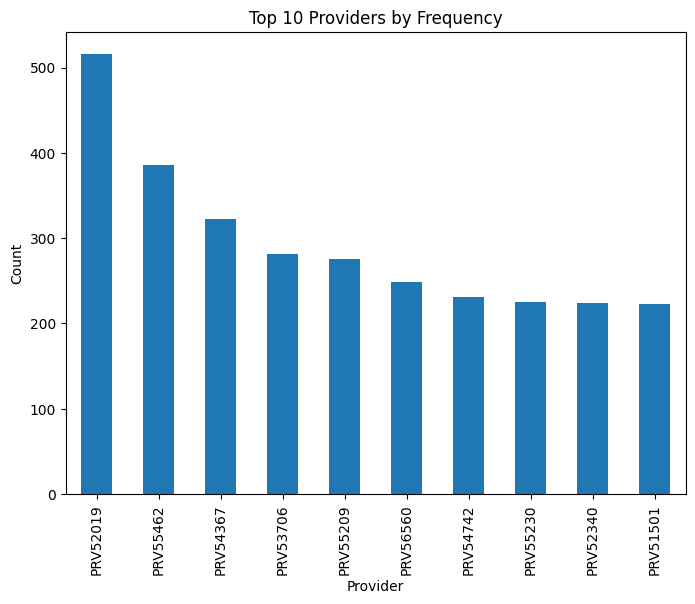

In [ ]:
provider_counts = df_inpatient['Provider'].value_counts().head(10)

plt.figure(figsize=(8, 6))
provider_counts.plot(kind='bar')
plt.xlabel('Provider')
plt.ylabel('Count')
plt.title('Top 10 Providers by Frequency')
plt.show()

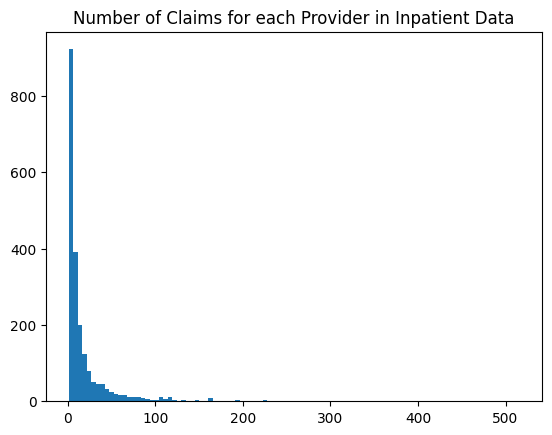

In [ ]:
# Check the number of claims for each provider in inpatient data
inpatient_provider_counts = df_inpatient['Provider'].value_counts()
plt.hist(inpatient_provider_counts, bins=100)
plt.title('Number of Claims for each Provider in Inpatient Data')
plt.show()

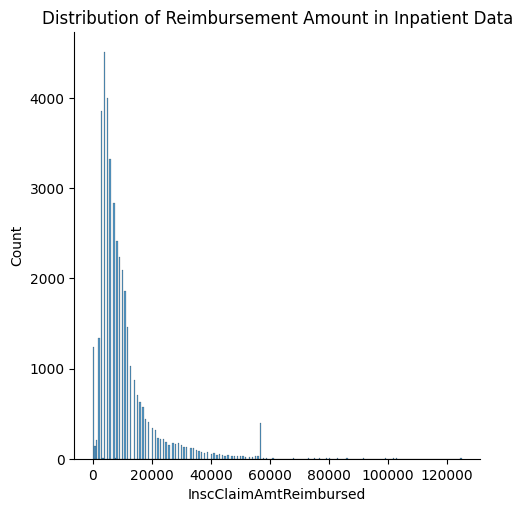

InscClaimAmtReimbursed_avg 10087.884073726344


In [ ]:
# Check the distribution of reimbursement amount
sns.displot(df_inpatient['InscClaimAmtReimbursed'], kde=False)
plt.title('Distribution of Reimbursement Amount in Inpatient Data')
plt.show()
InscClaimAmtReimbursed_avg = np.mean(df_inpatient['InscClaimAmtReimbursed'])
print(f'InscClaimAmtReimbursed_avg', InscClaimAmtReimbursed_avg)

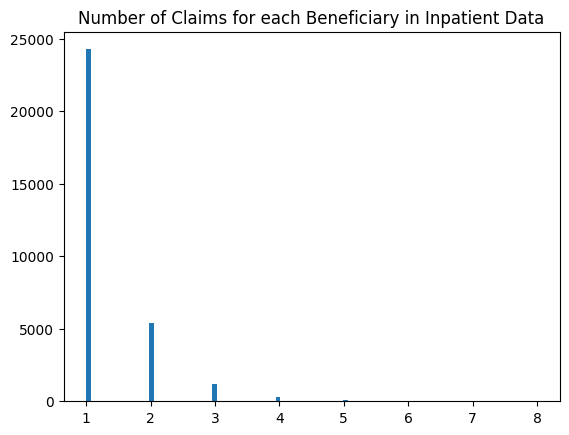

In [ ]:
# Check the number of claims for each beneficiary in inpatient data
inpatient_beneficiary_counts = df_inpatient['BeneID'].value_counts()
plt.hist(inpatient_beneficiary_counts, bins=100)
plt.title('Number of Claims for each Beneficiary in Inpatient Data')
plt.show()

In [ ]:
# How many beneficiary claimed IP
df_beneficiary["has_claimed_ip"] = df_beneficiary["BeneID"].isin(df_inpatient["BeneID"])
claimed_ip = df_beneficiary["has_claimed_ip"].sum()
percentage_claimed_ip = np.round((claimed_ip/len(df_inpatient)) * 100, 2)
print(percentage_claimed_ip)

77.31


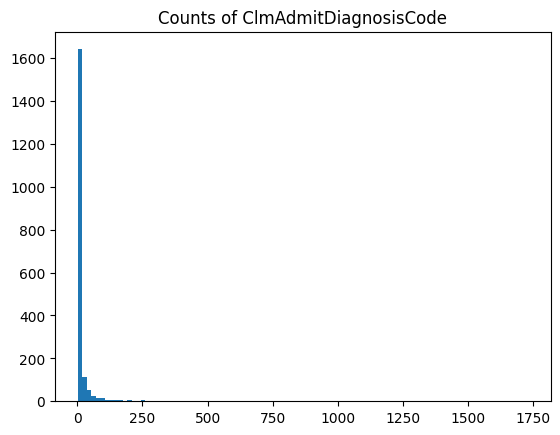

In [ ]:
DG=df_inpatient['ClmAdmitDiagnosisCode'].value_counts()
plt.hist(DG, bins=100)
plt.title('Counts of ClmAdmitDiagnosisCode')
plt.show()

Text(0.5, 1.0, 'Counts of ClmAdmitDiagnosisCode')

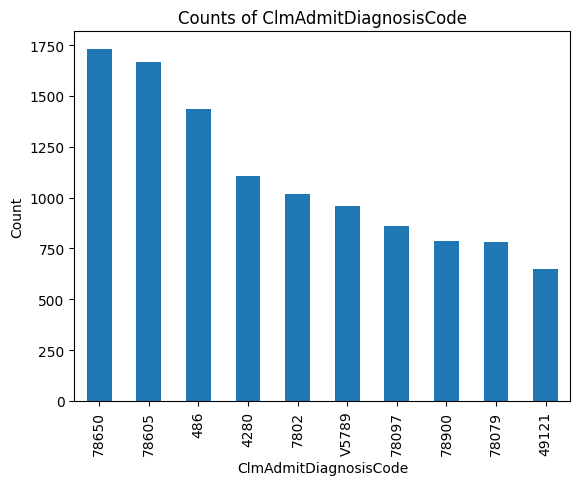

In [ ]:
df_inpatient['ClmAdmitDiagnosisCode'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmAdmitDiagnosisCode')
plt.ylabel('Count')
plt.title('Counts of ClmAdmitDiagnosisCode')

Text(0.5, 1.0, 'Counts of ClmDiagnosisCode_1')

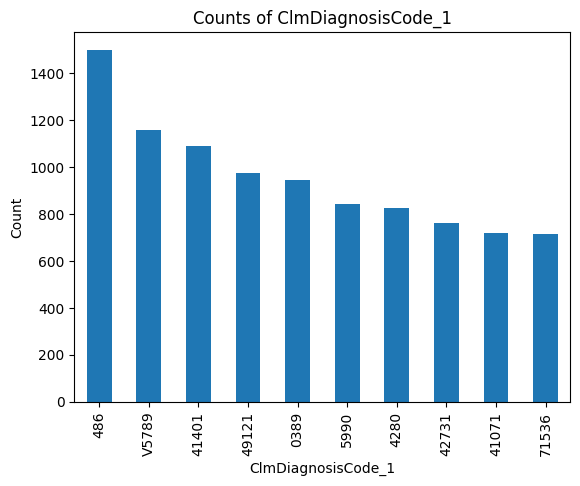

In [ ]:
df_inpatient['ClmDiagnosisCode_1'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmDiagnosisCode_1')
plt.ylabel('Count')
plt.title('Counts of ClmDiagnosisCode_1')

Text(0.5, 1.0, 'Counts of ClmDiagnosisCode_2')

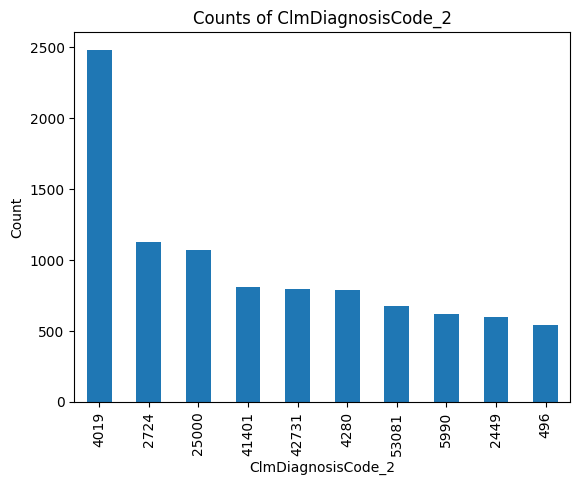

In [ ]:
df_inpatient['ClmDiagnosisCode_2'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmDiagnosisCode_2')
plt.ylabel('Count')
plt.title('Counts of ClmDiagnosisCode_2')

Text(0.5, 1.0, 'Counts of ClmDiagnosisCode_3')

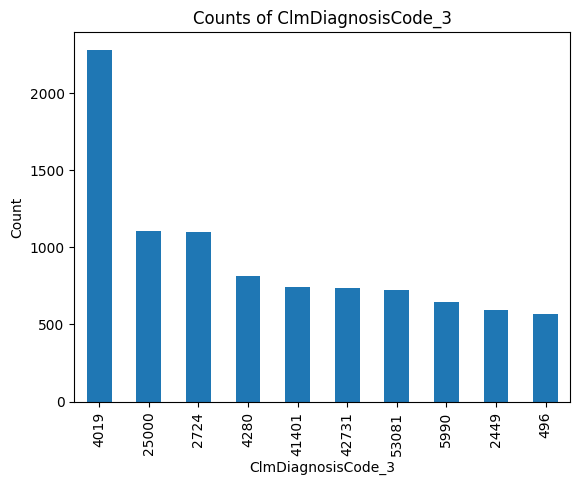

In [ ]:
df_inpatient['ClmDiagnosisCode_3'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmDiagnosisCode_3')
plt.ylabel('Count')
plt.title('Counts of ClmDiagnosisCode_3')

Text(0.5, 1.0, 'Counts of ClmDiagnosisCode_4')

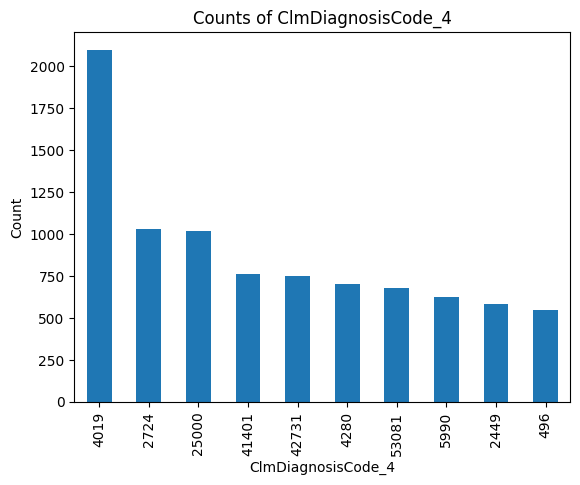

In [ ]:
df_inpatient['ClmDiagnosisCode_4'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmDiagnosisCode_4')
plt.ylabel('Count')
plt.title('Counts of ClmDiagnosisCode_4')

Text(0.5, 1.0, 'Counts of ClmProcedureCode_1')

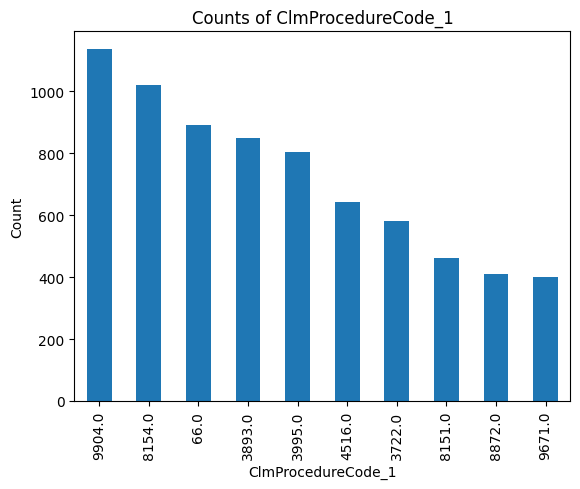

In [ ]:
df_inpatient['ClmProcedureCode_1'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmProcedureCode_1')
plt.ylabel('Count')
plt.title('Counts of ClmProcedureCode_1')

## 4. Outpatient Data Analysis

In [ ]:
df_outpatient.shape

(517737, 27)

In [ ]:
df_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claimdt'],
      dtype='object')

In [ ]:
df_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [ ]:
df_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
df_outpatient['ClaimStartDt'] = pd.to_datetime(df_outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
df_outpatient['ClaimEndDt'] = pd.to_datetime(df_outpatient['ClaimEndDt'],format = '%Y-%m-%d')
df_outpatient['Claimdt'] = ((df_outpatient['ClaimEndDt'] - df_outpatient['ClaimStartDt']).dt.days)+1
df_outpatient['Claimdt'].describe()

count    517737.000000
mean          2.420532
std           4.707387
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          24.000000
Name: Claimdt, dtype: float64

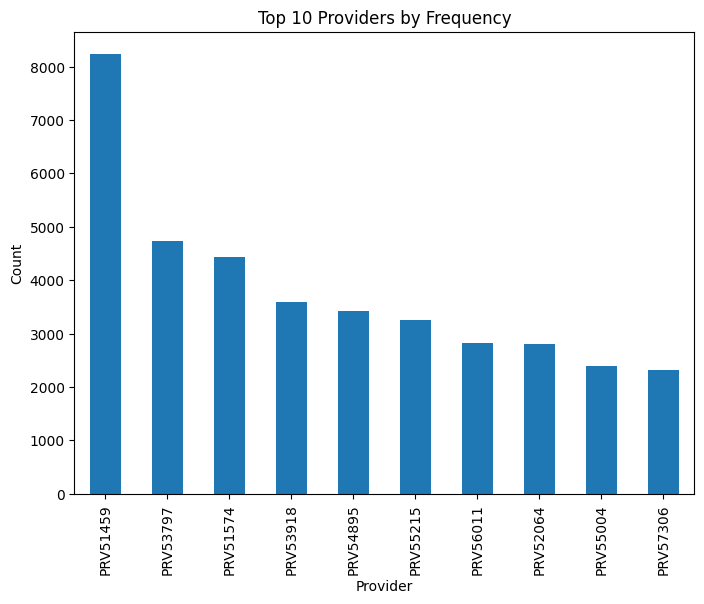

In [ ]:
provider_counts = df_outpatient['Provider'].value_counts().head(10)

plt.figure(figsize=(8, 6))
provider_counts.plot(kind='bar')
plt.xlabel('Provider')
plt.ylabel('Count')
plt.title('Top 10 Providers by Frequency')
plt.show()

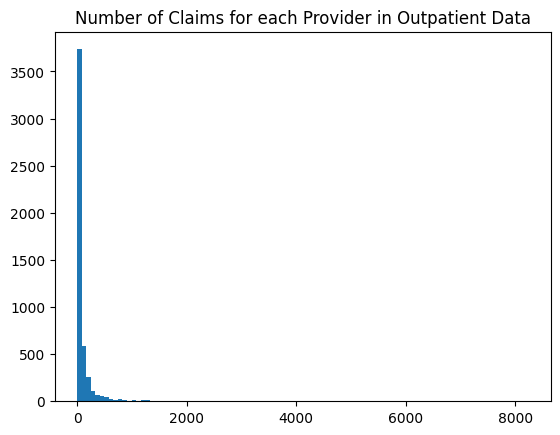

In [ ]:
# Check the number of claims for each provider in inpatient data
outpatient_provider_counts = df_outpatient['Provider'].value_counts()
plt.hist(outpatient_provider_counts, bins=100)
plt.title('Number of Claims for each Provider in Outpatient Data')
plt.show()

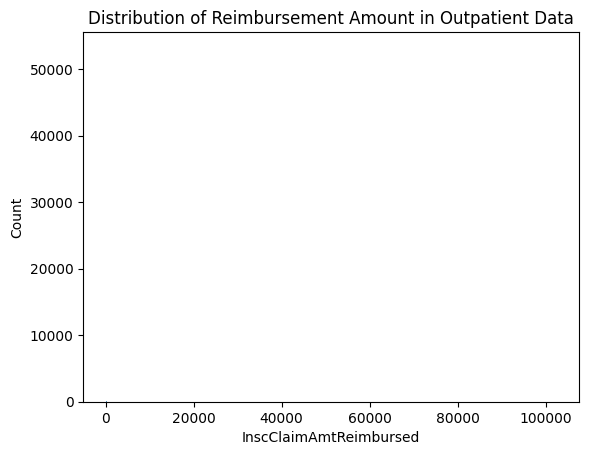

InscClaimAmtReimbursed_avg 286.33479932861667


In [ ]:
# Check the distribution of reimbursement amount
sns.histplot(df_outpatient['InscClaimAmtReimbursed'], kde=False)
plt.title('Distribution of Reimbursement Amount in Outpatient Data')
plt.show()

InscClaimAmtReimbursed_avg = np.mean(df_outpatient['InscClaimAmtReimbursed'])
print(f'InscClaimAmtReimbursed_avg', InscClaimAmtReimbursed_avg)

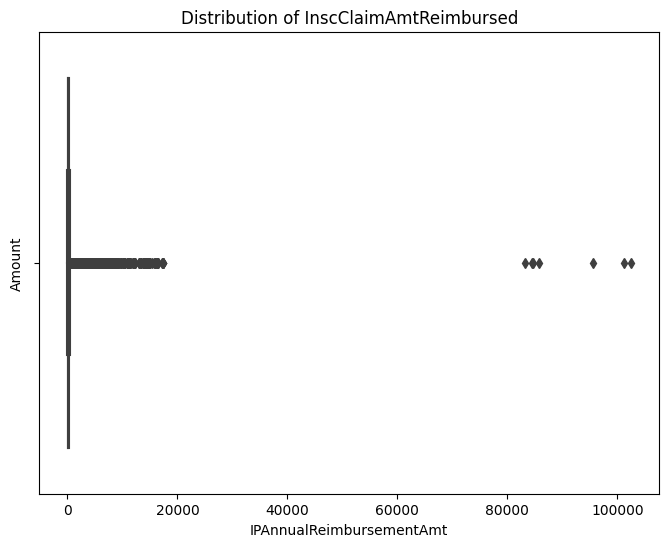

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_outpatient, x='InscClaimAmtReimbursed')
plt.xlabel('IPAnnualReimbursementAmt')
plt.ylabel('Amount')
plt.title('Distribution of InscClaimAmtReimbursed')
plt.show()

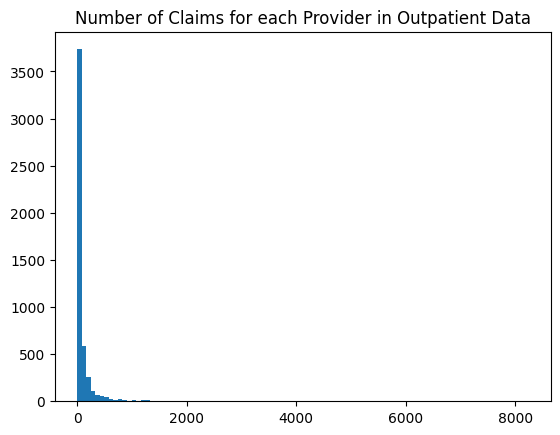

In [ ]:
# Check the number of claims for each provider in outpatient data
outpatient_provider_counts = df_outpatient['Provider'].value_counts()
plt.hist(outpatient_provider_counts, bins=100)
plt.title('Number of Claims for each Provider in Outpatient Data')
plt.show()

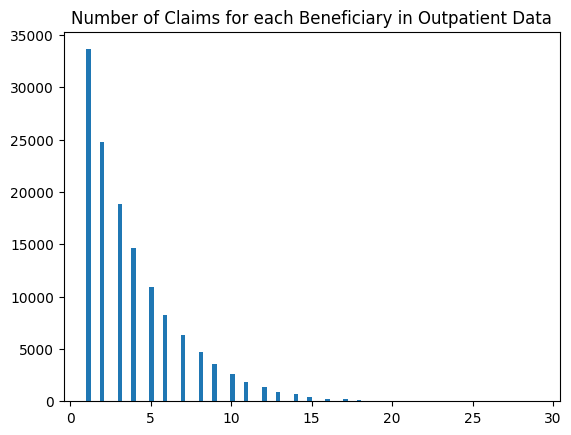

In [ ]:
# Check the number of claims for each beneficiary in outpatient data
outpatient_beneficiary_counts = df_outpatient['BeneID'].value_counts()
plt.hist(outpatient_beneficiary_counts, bins=100)
plt.title('Number of Claims for each Beneficiary in Outpatient Data')
plt.show()

In [ ]:
# How many beneficiary claimed op
df_outpatient["has_claimed_op"] = df_beneficiary["BeneID"].isin(df_outpatient["BeneID"])
claimed_op = df_outpatient["has_claimed_op"].sum()
percentage_claimed_op = np.round((claimed_op/len(df_beneficiary)) * 100, 2)
print(f"Percentage of beneficiaries who have claimed OP claim: {percentage_claimed_op}%")


Percentage of beneficiaries who have claimed OP claim: 96.7%


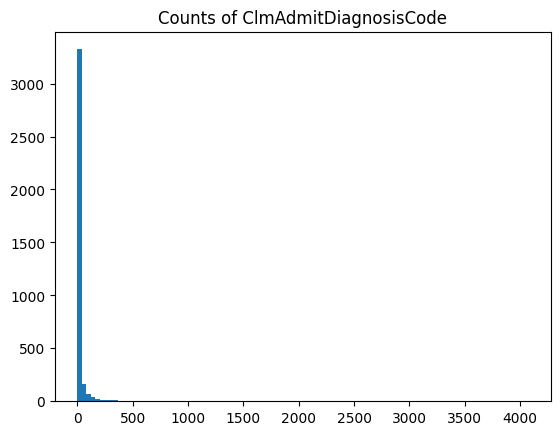

In [ ]:
DG=df_outpatient['ClmAdmitDiagnosisCode'].value_counts()
plt.hist(DG, bins=100)
plt.title('Counts of ClmAdmitDiagnosisCode')
plt.show()

Text(0.5, 1.0, 'Counts of ClmAdmitDiagnosisCode')

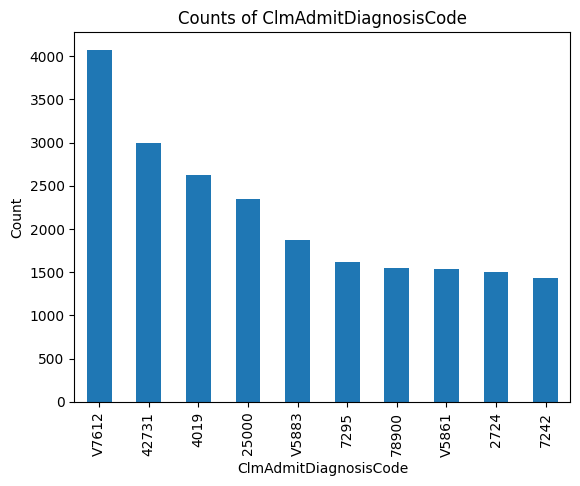

In [ ]:
df_outpatient['ClmAdmitDiagnosisCode'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmAdmitDiagnosisCode')
plt.ylabel('Count')
plt.title('Counts of ClmAdmitDiagnosisCode')

Text(0.5, 1.0, 'Counts of ClmDiagnosisCode_1')

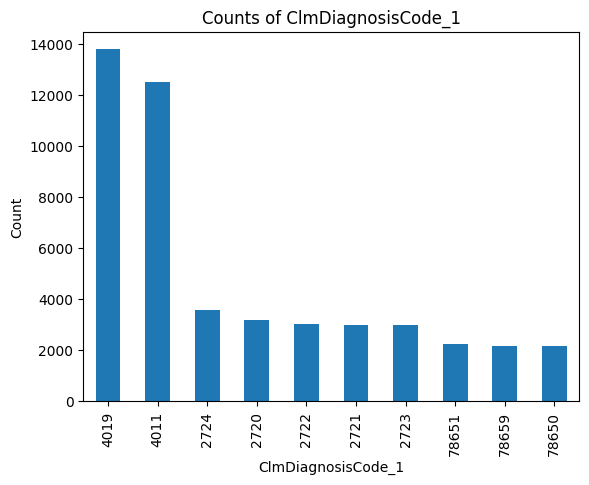

In [ ]:
df_outpatient['ClmDiagnosisCode_1'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmDiagnosisCode_1')
plt.ylabel('Count')
plt.title('Counts of ClmDiagnosisCode_1')

Text(0.5, 1.0, 'Counts of ClmDiagnosisCode_2')

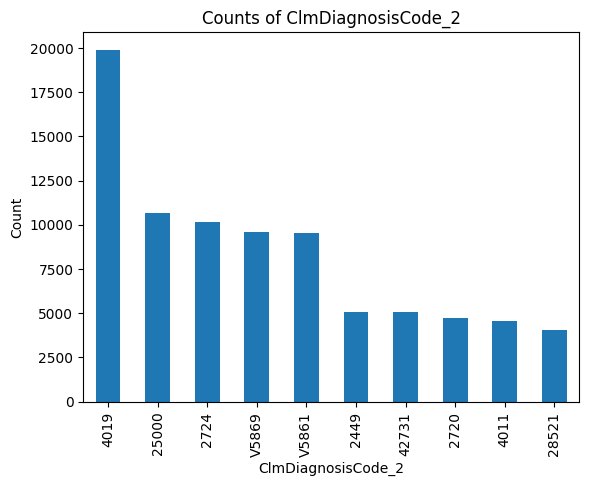

In [ ]:
df_outpatient['ClmDiagnosisCode_2'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmDiagnosisCode_2')
plt.ylabel('Count')
plt.title('Counts of ClmDiagnosisCode_2')

Text(0.5, 1.0, 'Counts of ClmDiagnosisCode_3')

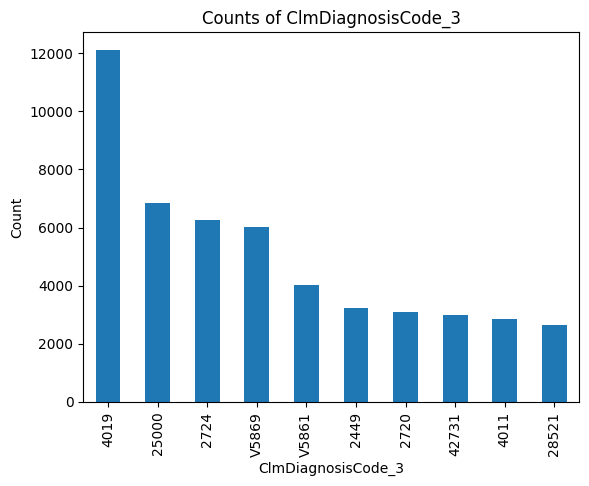

In [ ]:
df_outpatient['ClmDiagnosisCode_3'].value_counts().head(10).plot(kind='bar')
plt.xlabel('ClmDiagnosisCode_3')
plt.ylabel('Count')
plt.title('Counts of ClmDiagnosisCode_3')

## 5. Concat IP OP


In [ ]:
# Join ip, ben and prov data
df_IP = df_inpatient.join(df_provider.set_index('Provider'), on='Provider')
df_IP = df_IP.join(df_beneficiary.set_index('BeneID'), on='BeneID')
df_IP.shape

(40474, 60)

In [ ]:
df_IP.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claimdt', 'PotentialFraud', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'Chronic

In [ ]:
# Join op, ben and prov data
df_OP = df_outpatient.join(df_provider.set_index('Provider'), on='Provider')
df_OP = df_OP.join(df_beneficiary.set_index('BeneID'), on='BeneID')
df_OP.shape

(517737, 58)

In [ ]:
df_OP.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Claimdt', 'has_claimed_op', 'PotentialFraud',
       'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Dia

In [ ]:
df_ALL = pd.concat([df_OP, df_IP])
df_ALL.shape

(558211, 61)

In [ ]:
df_ALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 40473
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   ClmDiagnosisCode_1               547758 non-null  object        
 10  ClmDiagnosisCode_2               362605 non-n

In [ ]:
percent_missing = df_ALL.isnull().sum()*100/len(df_ALL)
print('Percent missing values in the Test Provider with patient details data:\n')
print(percent_missing)

Percent missing values in the Test Provider with patient details data:

BeneID                   0.000000
ClaimID                  0.000000
ClaimStartDt             0.000000
ClaimEndDt               0.000000
Provider                 0.000000
                          ...    
Has_ChronicCondition     0.000000
has_claimed_ip           0.000000
AdmissionDt             92.749337
DischargeDt             92.749337
DiagnosisGroupCode      92.749337
Length: 61, dtype: float64


In [ ]:
# Calculate the 'PotentialFraud' in IP

df_ip_frd = df_IP[df_IP['PotentialFraud'] == 1]
counts = df_ip_frd['PotentialFraud'].sum()
percentages = counts / len(df_IP) * 100
print(percentages)

57.81983495577408


In [ ]:
# Calculate the 'PotentialFraud' in OP

df_op_frd = df_OP[df_OP['PotentialFraud'] == 1]
counts = df_op_frd['PotentialFraud'].sum()
percentages = counts / len(df_OP) * 100
print(percentages)

36.58112130290089


In [ ]:
# Calculate overall fraud rate

df_all_frd = df_ALL[df_ALL['PotentialFraud'] == 1]
counts = df_all_frd['PotentialFraud'].sum()
percentages = counts / len(df_ALL) * 100
print(percentages)

38.12106891480103


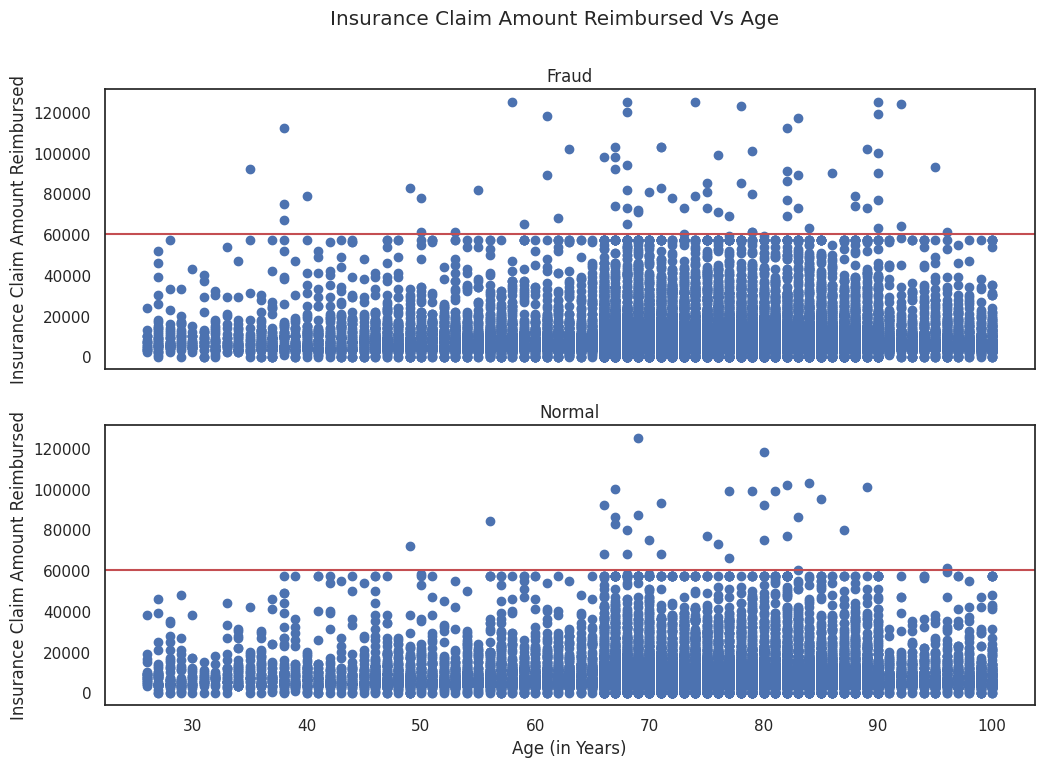

In [ ]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(df_IP[df_IP['PotentialFraud']==1].Age, 
            df_IP[df_IP['PotentialFraud']==1].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amount Reimbursed')

ax2.scatter(df_IP[df_IP['PotentialFraud']==0].Age, 
            df_IP[df_IP['PotentialFraud']==0].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Age (in Years)')
ax2.set_ylabel('Insurance Claim Amount Reimbursed')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

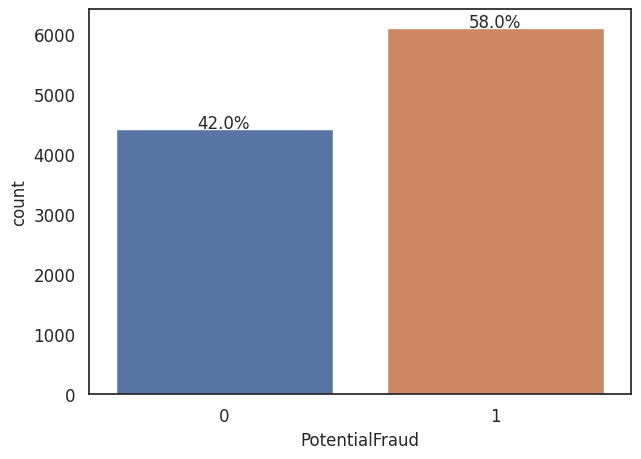

In [ ]:
df_IP_rdi = df_IP[df_IP['RenalDiseaseIndicator'] == 1]

if 'PotentialFraud' in df_IP_rdi.columns:
    plt.figure(figsize=(7,5))
    ax = sns.countplot(x='PotentialFraud', data=df_IP_rdi)
    plt.xticks(size=12)
    plt.xlabel('PotentialFraud', size=12)
    plt.yticks(size=12)
    plt.ylabel('count', size=12)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_IP_rdi))
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height() + 5
        ax.annotate(percentage, (x, y), size=12)
else:
    print("PotentialFraud column not found in df_IP_rdi.")

-0.006163483984363217


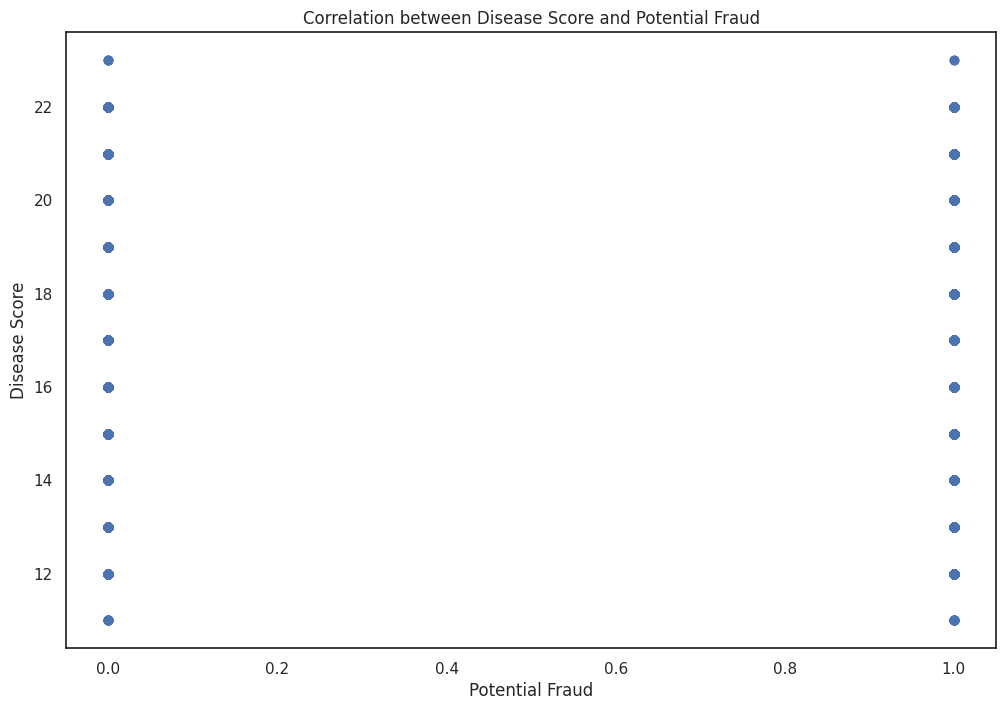

In [ ]:
#Correlation between disease score and potential fraud
correlation = df_IP['diseaseScore'].corr(df_IP['PotentialFraud'])
print(correlation)

plt.scatter(df_IP['PotentialFraud'], df_IP['diseaseScore'])
plt.xlabel('Potential Fraud')
plt.ylabel('Disease Score')
plt.title('Correlation between Disease Score and Potential Fraud')
plt.show()

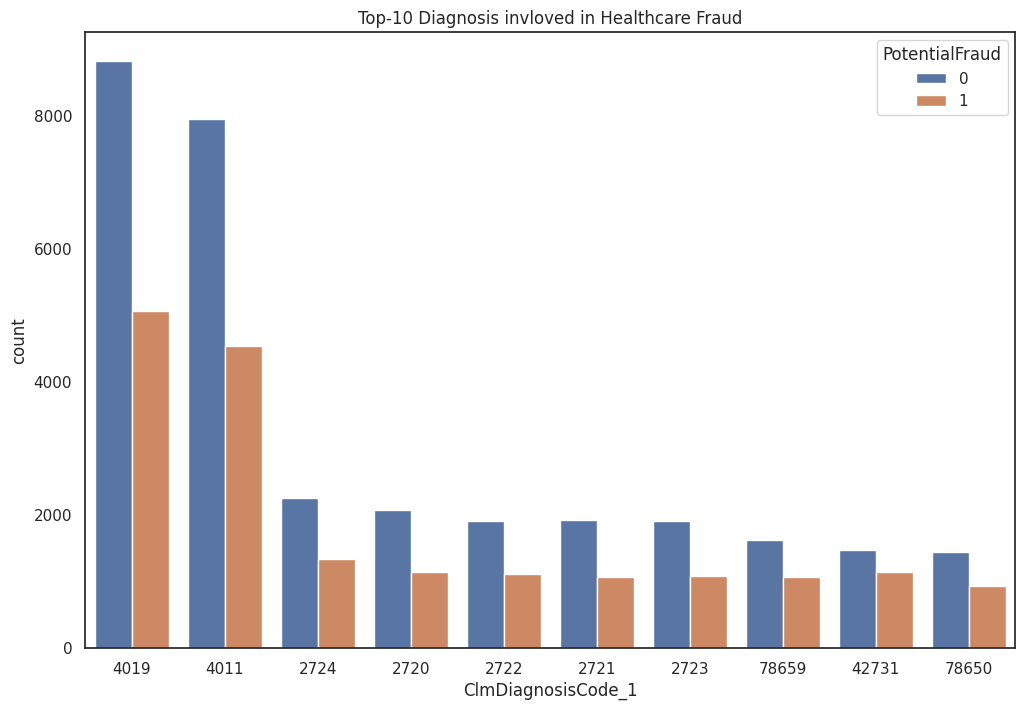

In [ ]:
# Top-10 Diagnosis invloved in Healthcare Fraud
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=df_ALL
              ,order=df_ALL.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

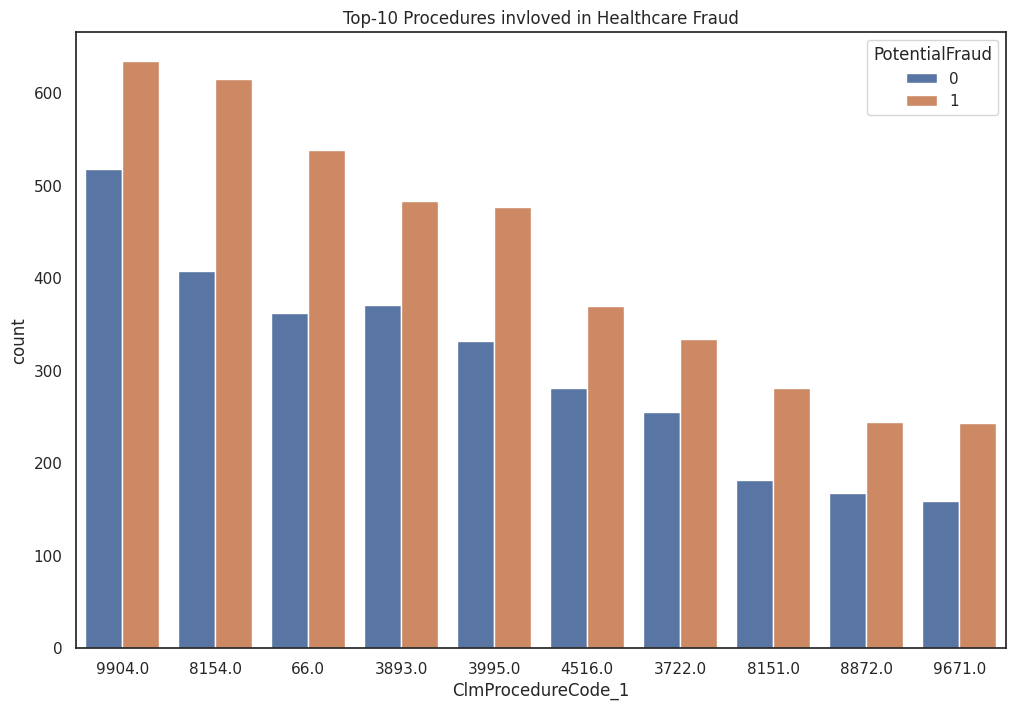

In [ ]:
# Top-10 Procedures invloved in Healthcare Fraud
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=df_ALL
              ,order=df_ALL.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

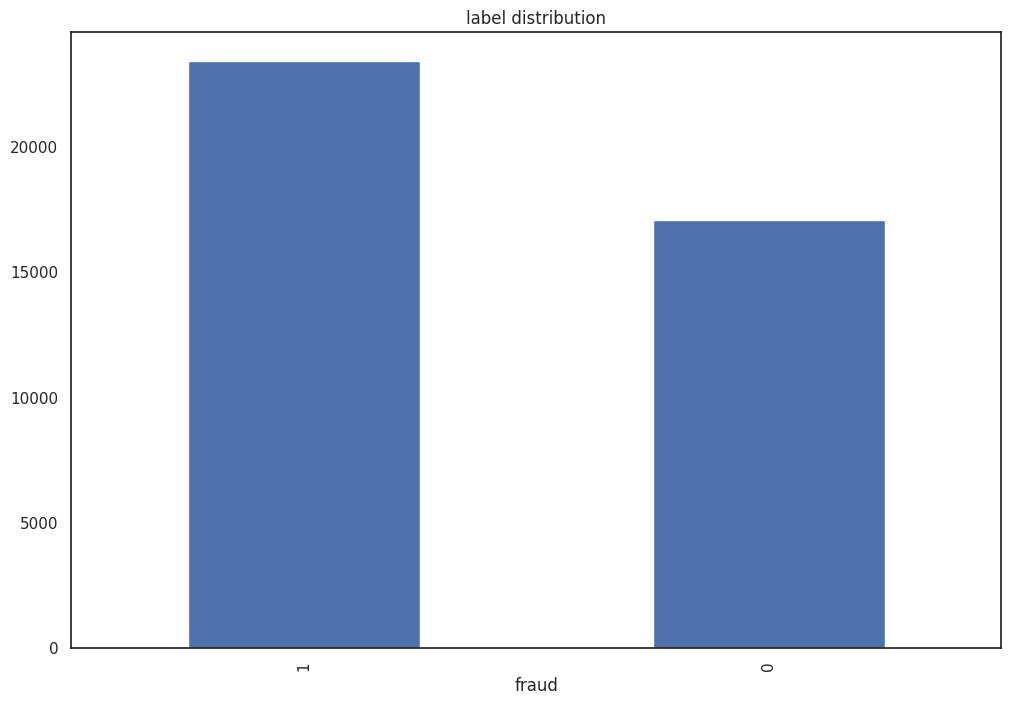

In [ ]:
df_IP['PotentialFraud'].value_counts().plot(kind='bar')
plt.title('label distribution')
plt.xlabel('fraud')
plt.show()

In [ ]:
df_IP['PotentialFraud'].value_counts(normalize=True)

1    0.578198
0    0.421802
Name: PotentialFraud, dtype: float64

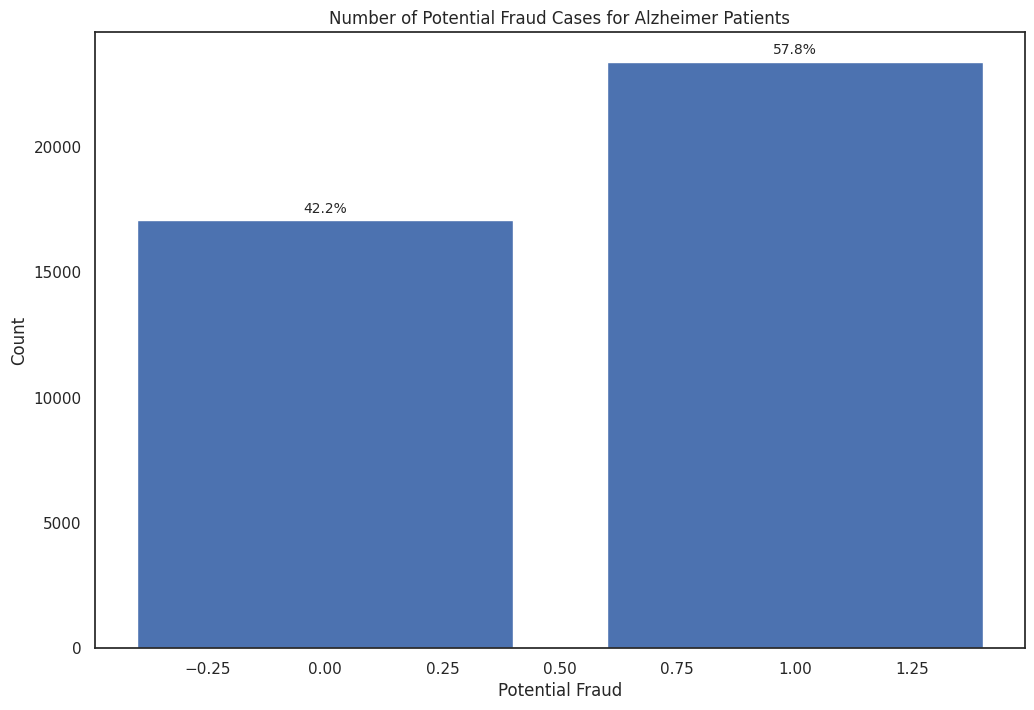

In [ ]:
df_IP_Alz = df_IP[df_IP['ChronicCond_Alzheimer'] == 1]
counts = df_IP['PotentialFraud'].value_counts()

# Calculate the percentage of each value in the 'PotentialFraud' column
percentages = counts.values / counts.sum() * 100

# Create a figure and axes
fig, ax = plt.subplots()

# Create a bar chart with the data
bars = ax.bar(counts.index, counts.values)

# Set the title and axis labels
ax.set_title('Number of Potential Fraud Cases for Alzheimer Patients')
ax.set_xlabel('Potential Fraud')
ax.set_ylabel('Count')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    ax.annotate(f'{percentage:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

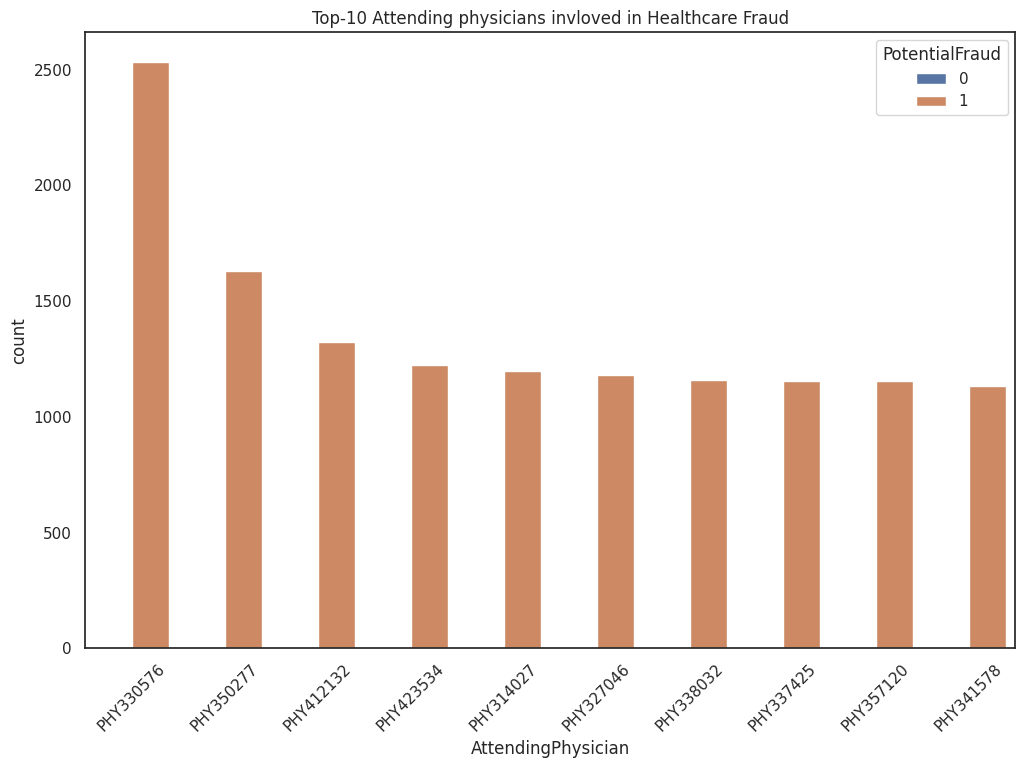

In [ ]:
# Top-10 Attending Physicians invloved in Healthcare Fraud 

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=df_ALL
              ,order=df_ALL.AttendingPhysician.value_counts().iloc[:10].index)

    
plt.title('Top-10 Attending physicians invloved in Healthcare Fraud')
plt.xticks(rotation=45)
plt.show()

# Processing


## Import Libraries

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

## 1. Data Preprosessing 1

In [ ]:
df_ALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 40473
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   ClmDiagnosisCode_1               547758 non-null  object        
 10  ClmDiagnosisCode_2               362605 non-n

In [ ]:
# Train 
remove_columns=['BeneID','ClaimID','ClaimStartDt', 'ClaimEndDt',  
                'AttendingPhysician','OperatingPhysician', 'OtherPhysician', 
                'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 
                'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
                'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 
                'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 
                'ClmProcedureCode_6', 'ClmAdmitDiagnosisCode', 'has_claimed_op', 
                'DOB','DOD', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'has_claimed_ip',
       'AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode']

df_ALL_trn=df_ALL.drop(axis=1,columns=remove_columns)
df_ALL_trn.shape

(558211, 31)

In [ ]:
df_ALL_trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 40473
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  object 
 1   InscClaimAmtReimbursed           558211 non-null  int64  
 2   ClmDiagnosisCode_1               547758 non-null  object 
 3   ClmDiagnosisCode_2               362605 non-null  object 
 4   ClmDiagnosisCode_3               243055 non-null  object 
 5   DeductibleAmtPaid                557312 non-null  float64
 6   Claimdt                          558211 non-null  int64  
 7   PotentialFraud                   558211 non-null  int64  
 8   Gender                           558211 non-null  int64  
 9   Race                             558211 non-null  int64  
 10  RenalDiseaseIndicator            558211 non-null  int64  
 11  State                            558211 non-null  int64  
 12  Cou

In [ ]:
# Separate X and y data
X = df_ALL_trn.drop(columns=['Provider', 'PotentialFraud'])
y = df_ALL_trn['PotentialFraud']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape



(446568, 29)

In [ ]:
!pip install category_encoders 
import category_encoders as ce
from category_encoders import TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.3 MB/s eta 0:00:00


In [ ]:
target_encoder = TargetEncoder()
X_train['ClmDiagnosisCode_1'] = target_encoder.fit_transform(X_train['ClmDiagnosisCode_1'],y_train)
X_test['ClmDiagnosisCode_1'] = target_encoder.transform(X_test['ClmDiagnosisCode_1'])

X_train['ClmDiagnosisCode_2'] = target_encoder.fit_transform(X_train['ClmDiagnosisCode_2'], y_train)
X_test['ClmDiagnosisCode_2'] = target_encoder.transform(X_test['ClmDiagnosisCode_2'])

X_train['ClmDiagnosisCode_3'] = target_encoder.fit_transform(X_train['ClmDiagnosisCode_3'], y_train)
X_test['ClmDiagnosisCode_3'] = target_encoder.transform(X_test['ClmDiagnosisCode_3'])

In [ ]:
X.isnull().sum()

InscClaimAmtReimbursed                  0
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
DeductibleAmtPaid                     899
Claimdt                                 0
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt             

In [ ]:
# Filling missing value
mode1 = X_train['ClmDiagnosisCode_1'].mode()[0]
X_train['ClmDiagnosisCode_1'].fillna(mode1,inplace=True)
X_test['ClmDiagnosisCode_1'].fillna(mode1,inplace=True)

mode2 = X_train['ClmDiagnosisCode_2'].mode()[0]
X_train['ClmDiagnosisCode_2'].fillna(mode2,inplace=True)
X_test['ClmDiagnosisCode_2'].fillna(mode2,inplace=True)

mode3 = X_train['ClmDiagnosisCode_3'].mode()[0]
X_train['ClmDiagnosisCode_3'].fillna(mode3,inplace=True)
X_test['ClmDiagnosisCode_3'].fillna(mode3,inplace=True)


mean1 = X_train['DeductibleAmtPaid'].mean()
X_train['DeductibleAmtPaid'].fillna(mean1, inplace=True)
X_test['DeductibleAmtPaid'].fillna(mean1, inplace=True)

## Logistic Regression

Supervised machine learning
Binary Logistic Regression

In [ ]:
# first try logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6311457055077345


Confusion Matrix:
[[65907  3337]
 [37843  4556]]


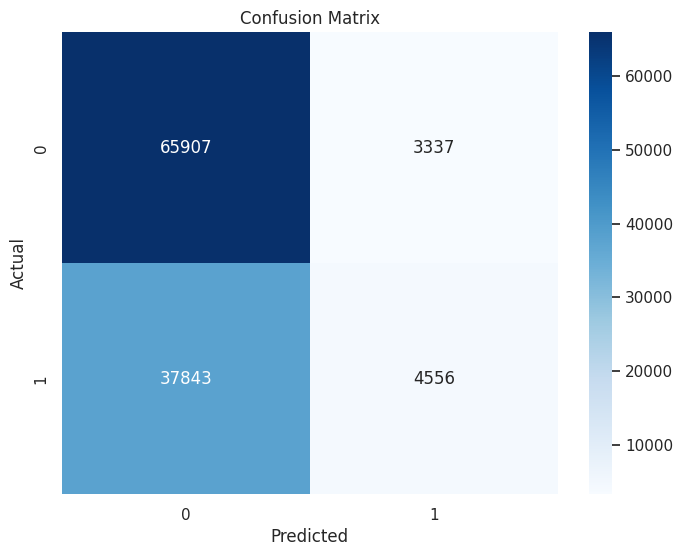

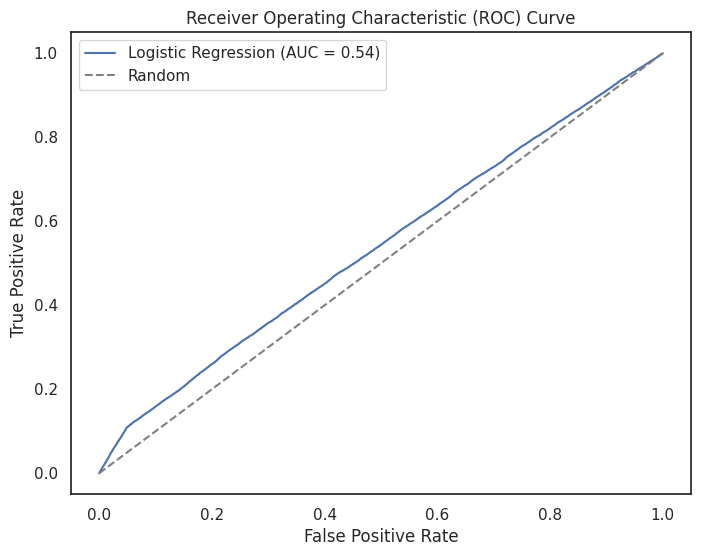

In [ ]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the probabilities for class 1 (fraud) for the ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Random Forest Classifier

In [ ]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7123868043674928


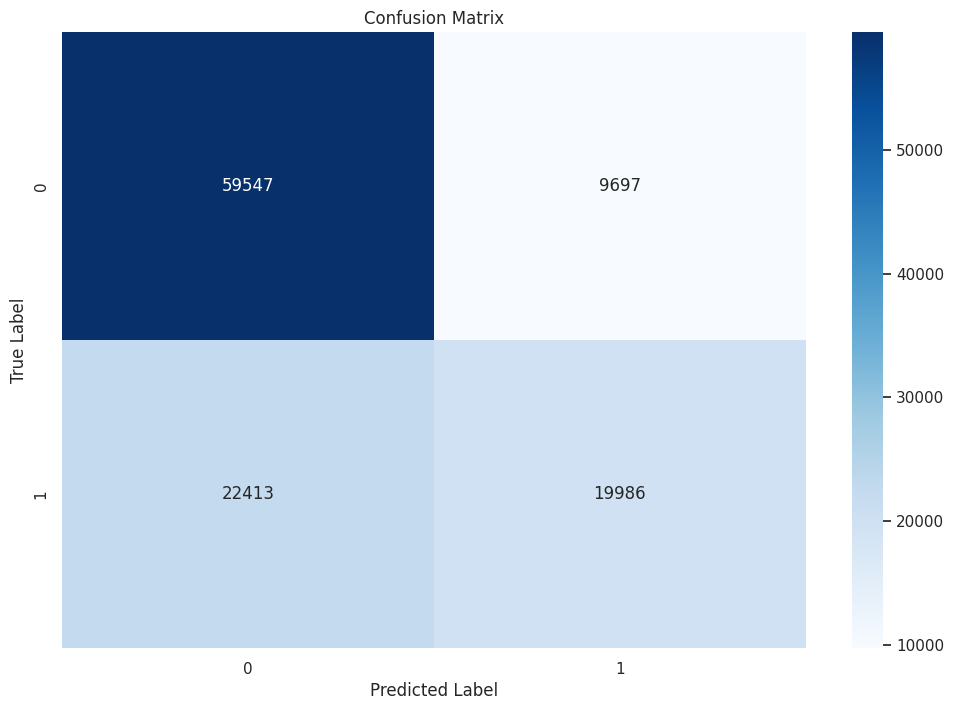

In [ ]:
# Create a confusion matrix to visualize the results
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

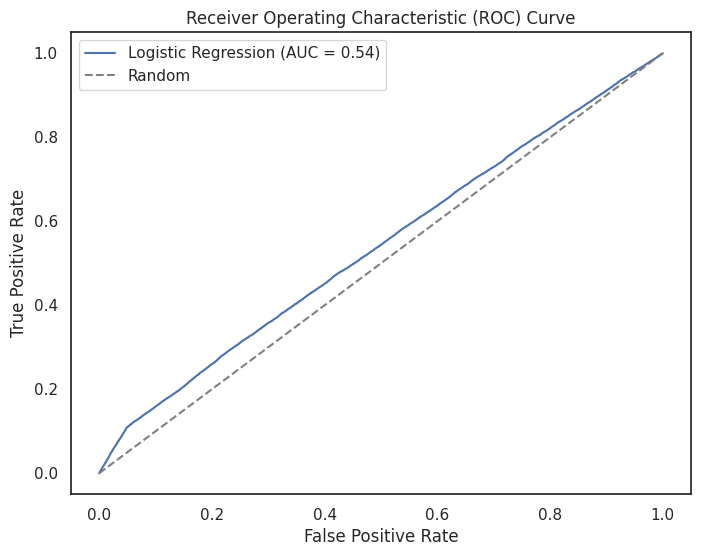

In [105]:
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Data Preprossing 2

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the X_train dataset
X_train_scaled = scaler.fit_transform(X_train)

# Transform the X_test dataset
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled,y_train)

print("Original shape of X_train:", X_train.shape)
print("Original shape of y_train:", y_train.shape)
print("Resampled shape of X_train:", X_train_resampled.shape)
print("Resampled shape of y_train:", y_train_resampled.shape)

Original shape of X_train: (446568, 29)
Original shape of y_train: (446568,)
Resampled shape of X_train: (552342, 29)
Resampled shape of y_train: (552342,)


In [ ]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5517049882213843


In [104]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6877457610418924


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Perform random oversampling on the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)
